# Portfolio Diversification Needed: Commercial Aviation for Polaris Capital

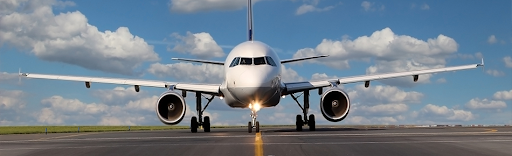

### Final Project Submission

* Student name: __[Liam Hudson](https://www.linkedin.com/in/liamhud-son)__
* Student pace: Self-Paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


## Overview
***

This project investigates civil aviation accident dataset from the __[National Transportation Safety Board](https://www.ntsb.gov/Pages/home.aspx)__ (NTSB), containing over 90,000 records of accident data between 1962 to 2023. Using data cleaning, analysis, and visualization techniques, the primary goal is to find the safest aircrafts based on a number of variables. These include the number of engines in each aircraft, its type of engine, injury severity, and injury count.

## Business Understanding
***

My business, Polaris Capital, wants to diversify its reach into new industries. I am tasked with investigating the potential risk of aircrafts and making three business suggestions that will help to make a decision that takes on as little risk as possible. I will base my suggestions on various components of an aircraft that have demonstrated low risk in the overall dataset of aviation accidents. Polaris Capital will use these suggestions to purchase and operate aircrafts for commercial and private enterprises.

## Data Understanding
***

The National Transportation Safety Board has a comprehensive dataset that records all civil aviation accidents from 1962 all the way to 2023. Each accident has a unique Event ID associated with aircraft components like make, model, and engine type. The data also records external variables like weather conditions, total injuries (i.e., minor, severe, fatal, and/or uninjured), and the phase of the flight.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the csv file
accidents = pd.read_csv('Aviation_Data.csv', low_memory = False)

In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
accidents.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation
***

### Data Cleaning

This dataset has a fairly large size of 90,348 rows and 31 columns. 

I am going to start by normalizing the column names and dropping unecessary ones.

In [6]:
# Make column names easier to deal with
accidents.columns = accidents.columns.str.lower().str.replace('.', '_')

# Drops unecessary columns in the dataset
accidents.drop(['event_id',
                'investigation_type',
                'accident_number',
                'event_date',
                'latitude', 
                'longitude', 
                'airport_code', 
                'airport_name', 
                'aircraft_category', 
                'registration_number', 
                'far_description', 
                'schedule', 
                'air_carrier',
                'broad_phase_of_flight',
                'weather_condition',
                'publication_date'], 
                 axis = 1, inplace = True)

Next, I want to drop the records that have no values for the columns I will be focusing on.

In [7]:
# Drop NaN values for important columns
accidents.dropna(subset = ['injury_severity', 
                           'number_of_engines', 
                           'engine_type',
                           'make',
                           'model'], 
                            axis = 0, inplace = True)
accidents.head()

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Probable Cause
2,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Probable Cause
3,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Probable Cause
5,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,Probable Cause


Much better. I also want to see if any of the columns I'm focusing on have values, like "unknown" or "invalid," as a string, instead of no value at all.

In [8]:
# Check engine_type values
accidents['engine_type'].value_counts()

engine_type
Reciprocating      68969
Turbo Shaft         3528
Turbo Prop          3311
Turbo Fan           2288
Unknown              770
Turbo Jet            690
Electric               7
LR                     2
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
UNK                    1
Name: count, dtype: int64

Looks like the `engine_type` column has some records with 'NONE', `Unknown', and 'UNK' as strings. I am going to replace these values with NaN and then drop them, accordingly.

In [9]:
# Replace the appropriate values with pd.NA
accidents['engine_type'].replace(['Unknown', 'UNK', 'NONE'], pd.NA, inplace = True)

/var/folders/0y/79r5lggs18d69s42s6p76mrw0000gn/T/ipykernel_33466/2428416608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accidents['engine_type'].replace(['Unknown', 'UNK', 'NONE'], pd.NA, inplace = True)


In [10]:
# Drop NaN values in accidents DataFrae
accidents['engine_type'].dropna(axis = 0, inplace = True)

# Check
accidents['engine_type'].value_counts()

engine_type
Reciprocating      68969
Turbo Shaft         3528
Turbo Prop          3311
Turbo Fan           2288
Turbo Jet            690
Electric               7
LR                     2
Hybrid Rocket          1
Geared Turbofan        1
Name: count, dtype: int64

## Analysis
***

Now that the data is cleaned, I want to immediately filter by the two makes of aircraft that I will be focusing on.

After conducting independent __[research](https://www.airlineratings.com/articles/worlds-safest-aircraft-for-2024-named)__, I learned that Boeing and Airbus produce reliable and safe commercial aircrafts.

### Boeing and Airbus

Immediately, I want to filter these aircrafts by passing the conditions for a "Non-Fatal" `injury_severity` and a count of 0 `total_serious_injuries` & `total_minor_injuries`.

By setting the condition for `injurity_severity` to "Non-Fatal," it already filters out records that have more than 0 `total_fatal_injuries`.

In [41]:
# Filter by conditions
boeing = accidents[(accidents['make'] == 'Boeing') &
                    (accidents['injury_severity'] == 'Non-Fatal') &
                    (accidents['total_serious_injuries'] == 0.0) &
                    (accidents['total_minor_injuries'] == 0.0)]
boeing.head()

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
242,"MEDFORD, OR",United States,Non-Fatal,Minor,Boeing,A75N1,No,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,3.0,Probable Cause
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
901,"AUSTIN, TX",United States,Non-Fatal,Substantial,Boeing,727-200,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,68.0,Probable Cause
1033,"ERICK, OK",United States,Non-Fatal,Destroyed,Boeing,E75,No,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,Probable Cause
1036,"MARIETTA, GA",United States,Non-Fatal,Minor,Boeing,A75N1,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,Probable Cause


In [12]:
# Filter by conditions
airbus = accidents[(accidents['make'] == 'Airbus') & 
                    (accidents['injury_severity'] == 'Non-Fatal') &
                    (accidents['total_serious_injuries'] == 0.0) &
                    (accidents['total_minor_injuries'] == 0.0)]
airbus.head()

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
63991,"Newark, NJ",United States,Non-Fatal,NaN,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,107.0,a fault in the airplane's AC 1 electrical bus ...
69796,"New Orleans, LA",United States,Non-Fatal,Minor,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,109.0,the captain's failure to properly recognize an...
84882,"Nassau, Bahamas",Bahamas,Non-Fatal,NaN,Airbus,A321,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,180.0,NaN
85407,"Panama City, Panama",Panama,Non-Fatal,NaN,Airbus,A319,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,112.0,NaN


### Engine Types

Now that I have made a few broad cuts, I want to investigate the engine types.

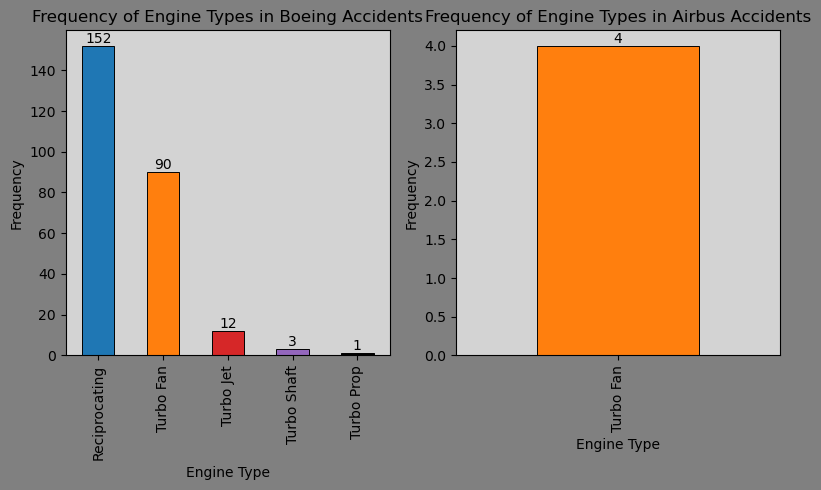

In [42]:
# Create frequency DataFrame for engine types
b_engine_type_frequency = boeing['engine_type'].value_counts()
a_engine_type_frequency = airbus['engine_type'].value_counts()

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 5))

# Create plot 1
b_engine_type_frequency.plot(kind = 'bar', 
                    color = ['tab:blue', 'tab:orange', 'tab:red', 'tab:purple', 'k'], 
                    edgecolor = 'k', 
                    linewidth = 0.7, 
                    ax = ax1)

# Set background color of chart
fig.set_facecolor('grey')

# Label first set of axes and title
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Engine Types in Boeing Accidents')
ax1.set_xticklabels(b_engine_type_frequency.index, rotation = 90)

# Set background color of plot 1
ax1.set_facecolor('lightgrey')

# Create plot 2
a_engine_type_frequency.plot(kind = 'bar', 
                    color = 'tab:orange', 
                    edgecolor = 'k', 
                    linewidth = 0.7, 
                    ax = ax2)

# Label second set of axes and title
ax2.set_xlabel('Engine Type')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Engine Types in Airbus Accidents')
ax2.set_xticklabels(a_engine_type_frequency.index, rotation = 90)

# Set background colors for plot 2
ax2.set_facecolor('lightgrey')

# Set bar labels for plot 1
for count in ax1.containers:
    labels = ax1.bar_label(count, label_type ='edge', fontsize = 10)

# Set bar labels for plot 2
for count in ax2.containers:
    labels = ax2.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

Reciprocating and Turbo Fan engines are the most frequent in Boeing accidents. It definitely seems like they are not the safest option.

But, I wonder if the number of engines have anything to do with the frequency of these records?

#### Reciprocating Engines

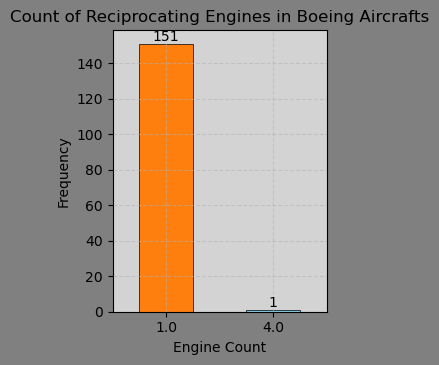

In [40]:
# Create a DataFrame for number of Reciprocating engines
reciprocating = boeing[boeing['engine_type'] == 'Reciprocating']
reciprocating_count = reciprocating['number_of_engines'].value_counts()

# Create plot
fig, ax = plt.subplots(figsize = (3, 3.75))
reciprocating_count.plot(kind = 'bar',
                         color = ['tab:orange', 'skyblue', 'tab:red', 'tab:purple', 'k'],
                         edgecolor = 'k',
                         linewidth = 0.5,
                         ax = ax)

# Set background colors
fig.set_facecolor('grey')
ax.set_facecolor('lightgrey')

# Label axes and title
ax.set_xlabel('Engine Count')
ax.set_ylabel('Frequency')
ax.set_title('Count of Reciprocating Engines in Boeing Aircrafts')
ax.set_xticklabels(reciprocating_count.index, rotation = 360)

# Set grid lines
plt.grid(True, linestyle = '--', alpha = 0.5)

# Set bar labels
for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

It is clear that Boeing aircrafts with reciprocating engines got into frequent accidents because of a lack of power. 151 of the crashes were planes that had only 1 engine.

### Turbo Fan Engines

I will look at the same for Turbo Fan engines.

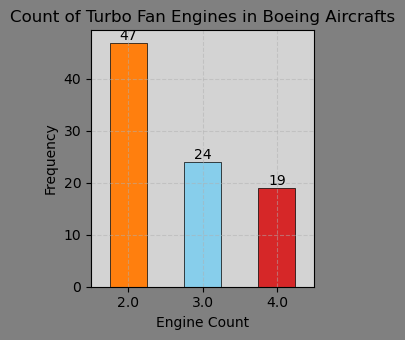

In [30]:
# Create a DataFrame for number of Turbo Fan engines
turbo_fan = boeing[boeing['engine_type'] == 'Turbo Fan']
fan_count = turbo_fan['number_of_engines'].value_counts()

# Create plot
fig, ax = plt.subplots(figsize = (3, 3.5))
fan_count.plot(kind = 'bar',
               color = ['tab:orange', 'skyblue', 'tab:red', 'tab:purple', 'k'],
               edgecolor = 'k',
               linewidth = 0.5,
               ax = ax)

# Set background colors
fig.set_facecolor('grey')
ax.set_facecolor('lightgrey')

# Label axes and title
ax.set_xlabel('Engine Count')
ax.set_ylabel('Frequency')
ax.set_title('Count of Turbo Fan Engines in Boeing Aircrafts')
ax.set_xticklabels(fan_count.index, rotation = 360)

# Set grid lines
plt.grid(True, linestyle = '--', alpha = 0.5)

# Set bar labels
for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

Although there are a lot of Boeing records with 2 Turbo Fan engines, specifically, the frequency of other records with 3 or 4 engines are not small enough to consider filtering out. As a result, I am going to take out _all_ Turbo Fan Boeing records.

In [17]:
# Create a filtered DataFrame
# The tilde (~) acts as a negation of the condition I set. Thus, I created a new DataFrame that keeps all records EXCEPT the ones that meet the conditions.
boeing = boeing[~(((boeing['engine_type'] == 'Reciprocating') & 
                  (boeing['number_of_engines'] == 1.0)) |
                  (boeing['engine_type'] == 'Turbo Fan'))]

boeing['engine_type'].value_counts()

engine_type
Turbo Jet        12
Turbo Shaft       3
Turbo Prop        1
Reciprocating     1
Name: count, dtype: int64

Records with Turbo Jet engines are more frequent than those with Turbo Prop or Shaft.

I am curious to see what that distribution looks like.

### Turbo Jet Engines

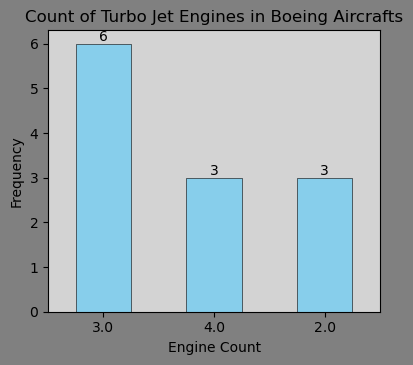

In [39]:
# Create a frequency DataFrame
boeing_turbo_jet = boeing[(boeing['engine_type'] == 'Turbo Jet')]
boeing_turbo_jet_count = boeing_turbo_jet['number_of_engines'].value_counts()

# Create plot
fig, ax = plt.subplots(figsize = (4, 3.75))
boeing_turbo_jet_count.plot(kind = 'bar',
                            color = 'skyblue',
                            edgecolor = 'k',
                            linewidth = 0.4,
                            ax = ax)

# Set background colors
fig.set_facecolor('grey')
ax.set_facecolor('lightgrey')

# Label axes and title
ax.set_title('Count of Turbo Jet Engines in Boeing Aircrafts')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Frequency')
ax.set_xticklabels(boeing_turbo_jet_count.index, rotation = 360)

# Set bar labels
for count in ax.containers:
    labels = ax.bar_label(count, label_type ='edge', fontsize = 10)

plt.tight_layout()
plt.show()

Similar to with Turbo Fan engines, these records do not demonstrate a significant margin between engine counts in each plane. Thus, I am going to drop all Turbo Jet records.

In [19]:
# Final filtered DataFrame for Boeing models
boeing_final = boeing[~((boeing['engine_type'] == 'Turbo Jet'))]
boeing_final

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
5726,NaN,Pakistan,Non-Fatal,Substantial,Boeing,747-121,No,4.0,<NA>,Unknown,0.0,0.0,0.0,245.0,Foreign
6545,"FRANKFORT, GERMANY",Germany,Non-Fatal,Substantial,Boeing,747-200F,No,4.0,<NA>,NaN,0.0,0.0,0.0,5.0,Foreign
19470,"BOGOTA, COLOMBIA",Colombia,Non-Fatal,Substantial,Boeing,707-330C,No,4.0,<NA>,NaN,0.0,0.0,0.0,3.0,Foreign
22058,NaN,Hong Kong,Non-Fatal,Substantial,Boeing,747-124,No,4.0,<NA>,NaN,0.0,0.0,0.0,15.0,Foreign
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
31838,"SAN LUIS, Argentina",Argentina,Non-Fatal,Destroyed,Boeing,737-200C,No,0.0,<NA>,Unknown,0.0,0.0,0.0,113.0,Foreign
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause


Looks like there are still some records with no values in the `engine_type` column. I am going to remove these.

In [20]:
# Drop <NA> values in the engine_type column
boeing_final = boeing_final.dropna(subset=['engine_type'])
boeing_final

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause


Going to update the models DataFrames for each type of aircraft.

In [21]:
# Create a consolidated DataFrame of both Airbus and Boeing models
aircrafts = [boeing_final, airbus]
cleaned_df = pd.concat(aircrafts)
cleaned_df

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause
63991,"Newark, NJ",United States,Non-Fatal,NaN,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,107.0,a fault in the airplane's AC 1 electrical bus ...
69796,"New Orleans, LA",United States,Non-Fatal,Minor,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,109.0,the captain's failure to properly recognize an...
84882,"Nassau, Bahamas",Bahamas,Non-Fatal,NaN,Airbus,A321,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,180.0,NaN
85407,"Panama City, Panama",Panama,Non-Fatal,NaN,Airbus,A319,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,112.0,NaN


After making some broad and some more specific cuts to the dataset, I managed to narrow it down to 7 models that represent the least risky components of an aircraft.

I am going to create a CSV file from this new DataFrame to upload to a Tableau dashboard. 

In [ ]:
# Convert to a CSV file
cleaned_df.to_csv('safe_crafts.csv')

## Analysis and Results
***

After investigating the dataset and searching for aircrafts that fulfilled a certain amount of criteria, I have identified the main components that my business should use to purchase and operate the aircrafts with the least amount of risk:

* Boeing

    * Turbo Shaft engine
    * Turbo Prop engine
    * Reciprocating engine
        * At least 4
        
* Airbus

    * Turbo Fan engine
        * At least 2

The variables that these decisions are based on:
* Non-Fatal injury severity
* Frequency of records with given engine type/count
* Injury count of 0 (i.e., Minor, Serious, etc.)

### Business Recommendation 1: Boeing and Airbus
***

Upon conducting individual research on which manufacturers produced reliable commerical aircrafts, I found that Boeing and Airbus were consistently at the top. 

Using the variables I detailed, I made two filtered DataFrames of Boeing and Airbus records. This allowed me to focus on specific models that were the least risky, according to an analysis of engine type, count, and injury severity.

In [51]:
airbus

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
63991,"Newark, NJ",United States,Non-Fatal,NaN,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,107.0,a fault in the airplane's AC 1 electrical bus ...
69796,"New Orleans, LA",United States,Non-Fatal,Minor,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,109.0,the captain's failure to properly recognize an...
84882,"Nassau, Bahamas",Bahamas,Non-Fatal,NaN,Airbus,A321,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,180.0,NaN
85407,"Panama City, Panama",Panama,Non-Fatal,NaN,Airbus,A319,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,112.0,NaN


In [50]:
boeing

,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
669,"MARANA, AZ",United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,Probable Cause
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
36703,"BELLEVILLE, MI",United States,Non-Fatal,Substantial,Boeing,747-238B,No,4.0,Turbo Jet,Positioning,0.0,0.0,0.0,4.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
45337,"MIAMI, FL",United States,Non-Fatal,Substantial,Boeing,747-259B,No,4.0,Turbo Jet,NaN,0.0,0.0,0.0,4.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause


### Business Recommendation 2: Engine Type
***

During my investigation, I found that Boeing aircrafts with Reciprocating and Turbo Fan engines got into the most accidents. Unsimilarly, the only engine type for the Airbus models was Turbo Fan, which made the analysis rather easy. After the appropriate filters, there were only 4 Airbus records remaining.

Below is the chart modeling the aviation accident frequency in planes with those types of engines. This is the same chart that I created earlier in the [Analysis](#analysis) section.

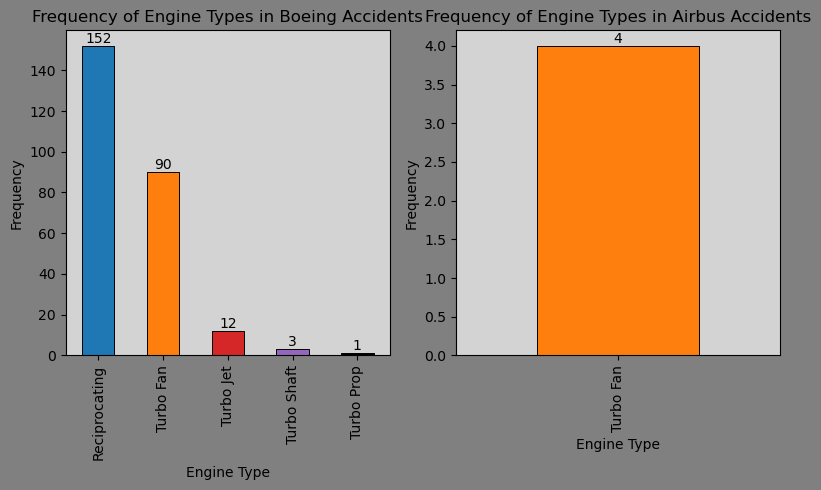

Seeing as the two most frequent engine types in Boeing planes make up a large percentage of total Boeing records, it is much easier to filter them all out. 

The same cannot be said for Turbo Jet engines, however. After cutting out the Fan and Reciprocating engines, Turbo Jet has a significant lead on Turbo Shaft and Turbo Prop records. But, this lead is not large enough to consider cutting it out completely. Thus, I was led to further analysis and to make a third suggestion on minimizing potential risk in aircrafts.

### Business Recommendation 3: Number of Engines
***

After identifying the engine types that were not ideal for Boeing planes, I visualized those records by their engine count to see if some were less frequent than others.

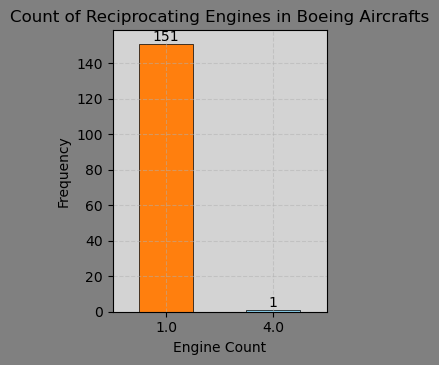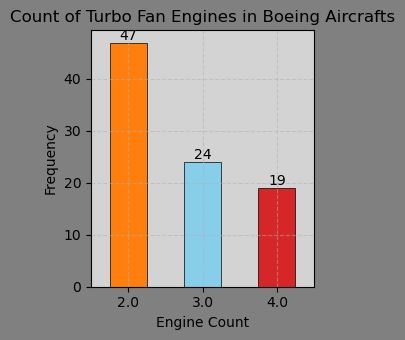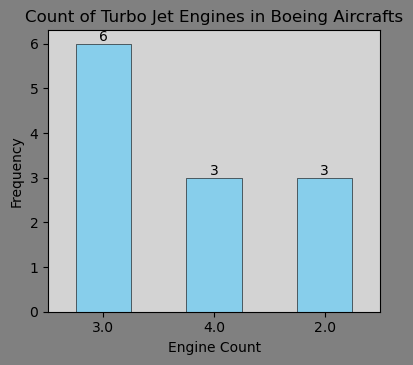

These charts allowed me to see that Boeing planes with 4 Reciprocating engines were reliable enough to only get into 1 accident out of 152. The other 151 were planes that had 1 Reciprocating engine, which was most likely caused a lack of power during the flight.

With the other engine types, there was not a significantly large enough disparity between engine counts for me to consider filtering by those specifics. For example, there are more records of Boeing accidents with 3 Turbo Jet engines, as opposed to 2 or 4. But, because there are the same amount of Turbo Jet records with 2 or 4 engines (3 records), an accurate correlation cannot be identified between the count of engines in these accidents. Thus, it is wiser to filter them all out.

### Model Recommendations
***

In [122]:
cleaned_df

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,report_status
28212,"DENVER, CO",United States,Non-Fatal,Substantial,Boeing,DHC-6-300,No,2.0,Turbo Prop,Business,0.0,0.0,0.0,2.0,Probable Cause
38627,"FAYETTEVILLE, NC",United States,Non-Fatal,Substantial,Boeing,B-17G,No,4.0,Reciprocating,Business,0.0,0.0,0.0,3.0,Probable Cause
43360,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,MD600N,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,Probable Cause
44957,"MESA, AZ",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Instructional,0.0,0.0,0.0,2.0,Probable Cause
47532,"TAFT, CA",United States,Non-Fatal,Substantial,Boeing,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,1.0,Probable Cause
63991,"Newark, NJ",United States,Non-Fatal,NaN,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,107.0,a fault in the airplane's AC 1 electrical bus ...
69796,"New Orleans, LA",United States,Non-Fatal,Minor,Airbus,A320,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,109.0,the captain's failure to properly recognize an...
84882,"Nassau, Bahamas",Bahamas,Non-Fatal,NaN,Airbus,A321,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,180.0,NaN
85407,"Panama City, Panama",Panama,Non-Fatal,NaN,Airbus,A319,No,2.0,Turbo Fan,NaN,0.0,0.0,0.0,112.0,NaN


The results of my analysis have led me to make the following recommendations for commercial aircrafts:

* Boeing Model:
    * DHC-6-300
    * B-17G
    * MD600N
    * 369E
* Airbus Model:
    * A319
    * A320
    * A321

## Conclusion
***

This analysis has led to three primary recommendations for Polaris Capital to consider when looking for aircrafts to puchase and operate:

1. **Airbus and Boeing aircrafts are the best option for commercial use.**  Not only do these two manufacturers produce very popular commercial jets, but their planes are reliable and contain components that greatly minimize risk in the case of an unlikely accident.

2. **Turbo shaft and Turbo prop are consistently reliable.** Within the Boeing models that I have recommended, many have a turbo engine. But, upon deep analysis, it can be deduced that only the Shaft and Prop variations are reliable. <br>On the other hand, all the Airbus models I have recommended have only 2 Turbo Fan engines, but still perform significantly better with them than the Boeing models do.

3. **In the unlikely case of an aviation accident, it is important to select planes with an injury count of 0.** It is impossible to lower aviation accident rates to 0%. As a result, when selecting an aircraft to invest in, having an injury count of 0 speaks volumes to the plane's safety mechanisms and overall structure. All of the models I have recommended have had an injury count of 0 when in an accident.

## Next Steps
***

Further analyses could expose more insight to potentially better alternatives:

* Better predictions of accidents' causes. Many variables that were not detailed in this dataset could play a significant role in the cause of an accident.

* Detailed research into "Probable Cause" accident reports. The National Transportation Safety Board explores "Probable Cause" in this __[documentation](https://www.faa.gov/sites/faa.gov/files/2022-11/Boeing%20review%20of%20NTSB%20probable%20cause.pdf)__, meaning that there is a comprehensive report on exactly what caused each particular accident. When deciding on an aircraft to purchase and operate, it could be important to look at the specifics of what caused its crash.

* Looking at outliers in the data. My task was to identify the main components of an aircraft that are the least likely to cause an accident. However, there were some records that had outlier data, like the planes with "Electric," "LR," "Hybrid Rocket," and "Geared Turbofan" engine types. I chose not to investigate those records as they composed a small percentage of the data and would not result in a conducive analysis.